# Transformacja Fouriera
Opracowanie: A.Florkowska

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft2, fftshift
import scipy.ndimage as nd
from skimage import io
from skimage import color
import time
from IPython.display import Image

In [46]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
image = io.imread(".././images/example1.png")
image = image[:,:,0:3]
image = color.rgb2gray(image)
image = normalize(image)

# Transformacja Fouriera
Transformacja Fouriera to matematyczna operacja, która przekształca sygnał czasowy (lub sygnał dyskretny) z dziedziny czasu do dziedziny częstotliwości. Pozwala również zapisać wejściowy sygnał jako sumę sygnałów sinusoidalnych o różnych częstotliwościach. Jest ona szczególnie ważna, ponieważ pozwala analizować sygnały właśnie w dziedzinie częstotliwości, co pozwala na wykrywanie charakterystycznych częstotliwości, filtrowanie sygnału, kompresję danych, czy rozpoznawanie pewnych wzorców.

Inne znane metody przejścia z dziedziny czasu do dziedziny częstotliwości to m.in. algorytm Cooleya-Tukeya.

Transformacja a transformata to zupełnie coś innego. Transformacja to operacja, a transformata to jego wynik.

Obraz to funkcja wielu zmiennych, tak więc można zastosować dla niej transformację Fouriera. Przkeształca ona obraz z dziedziny przestrzennej (x,y) do dziedziny częstotliwości (u,v). W wyniku transformacji uzyskujemy informacje na temat zawartych w obrazie częstotliwości, które mogą reprezentować różne cechy obrazu, takie jak krawędzie, tekstury, czy struktury, czyli odnosić się do zmian w intensywności lub kolorze obrazu. W ten sposób uzyskany jest obraz, którego każdy punkt reprezentuje określoną częstotliwość. 

"Wysokie" częstotliwości w obrazie odpowiadają szybkim zmianom intensywności pikseli (na przykład przy krawędziach obiektów lub w obszarach z drobnymi szczegółami), podczas gdy "niskie" częstotliwości odnoszą się do powolnych zmian intensywności (na przykład jednolite obszary). 

Aby wyświetlić magnitudę spektrum w skali logarytmicznej, często stosuje się 20-krotność logarytmu dziesiętnego z magnitudy, co odpowiada wyrażeniu w decybelach (dB). Skala logarytmiczna jest użyteczna, gdy zakres wartości magnitudy jest bardzo szeroki i chcemy lepiej zobaczyć różnice w mniejszych wartościach magnitudy. 

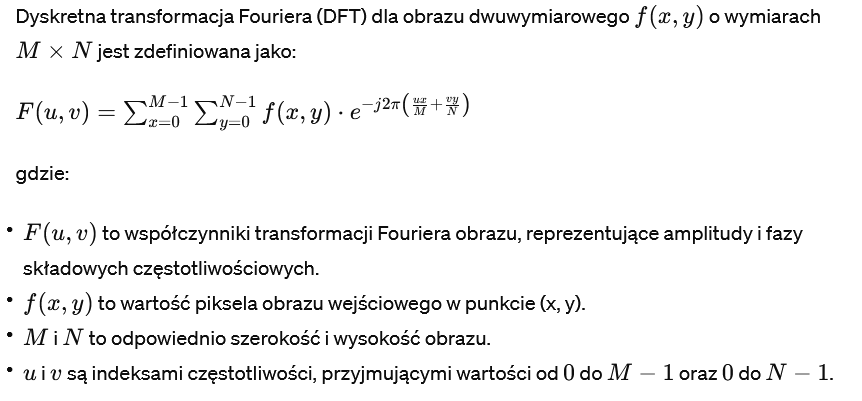

In [39]:
Image(filename=".././images/4_1.png", width=600)

Często do celów wizualizacyjnych uzywa się funckji fftshift, która służy do przesunięcia części spektrum tak, aby składowa o niskiej częstotliwości znajdowała się w środku spektrum - co można zaobserwować na poniższym rysunku: duzo bardziej jest czytelniejszy obraz przesuniętego widma. 

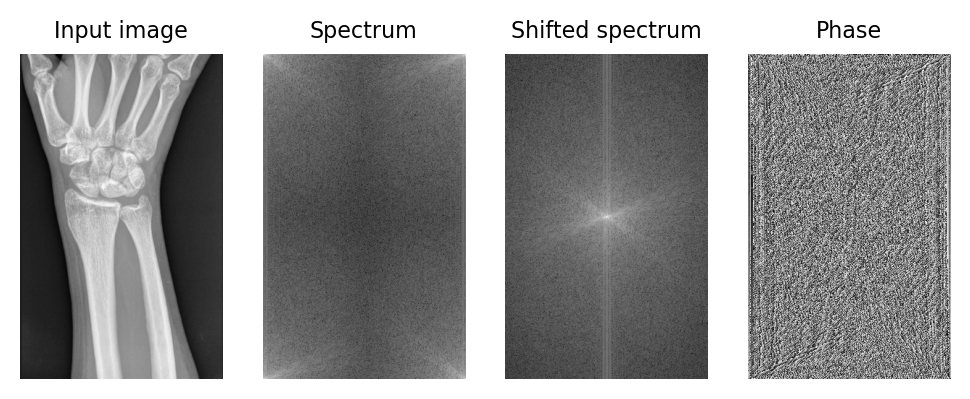

In [40]:
fft_image = fft2(image)
magnitude = np.abs(fft_image)
phase = np.angle(fft_image)
magnitude_spectrum = 20 * np.log(magnitude + np.finfo(float).eps)
fft_image_shifted = fftshift(fft_image)
magnitude_shifted = np.abs(fft_image_shifted)
magnitude_shifted_spectrum = 20 * np.log(magnitude_shifted + np.finfo(float).eps)

plt.figure(figsize=(6, 4),dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Input image", fontsize=8)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Spectrum", fontsize=8)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(magnitude_shifted_spectrum, cmap='gray')
plt.title("Shifted spectrum", fontsize=8)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(phase, cmap='gray')
plt.title("Phase", fontsize=8)
plt.axis('off')
plt.show()

# Ale w jaki sposób interpretować te wykresy?
Po pierwsze, wykres przesuniętego widma należy rozumieć tak: w środku niskie częstotliwości, a na krańcach wysokie częstotliwości. Dodatkowo jeśli w widmie są jakieś linie, pokazują one KIERUNEK zmian na obrazie. Jeśli popatrzymy na zdjęcie kości i jego widmo, to faktycznie można się zgodzić, że dominują tam raczej niskie częstotliwości niż wysokie. 

Zacznijmy jednak od początku. Skoro transformacja Fouriera pozwala na zapis sygnału w postaci sumy sygnałów sinusoidalnych, to spróbujmy zanalizować takie widmo. Obraz składa się z dwóch sygnałów sinusoidalnych o różnych częstotliwościach - to też można wyczytać z jego widma. Magnituda pozwala odczytać częstotliwość, natomiast kierunek zmian na widmie mówi o orientacji funkcji.

Zachęcam do obejrzenia tych dwóch filmów, które wyjaśniają:- 
- czym jest operacja transformacji Fouriera (https://www.youtube.com/watch?v=3gAZ0U66AEA)
- o zastosowaniu transformacji Fouriera w przetwarzania obrazów (https://www.youtube.com/watch?v=tlwIWjeuu8U)

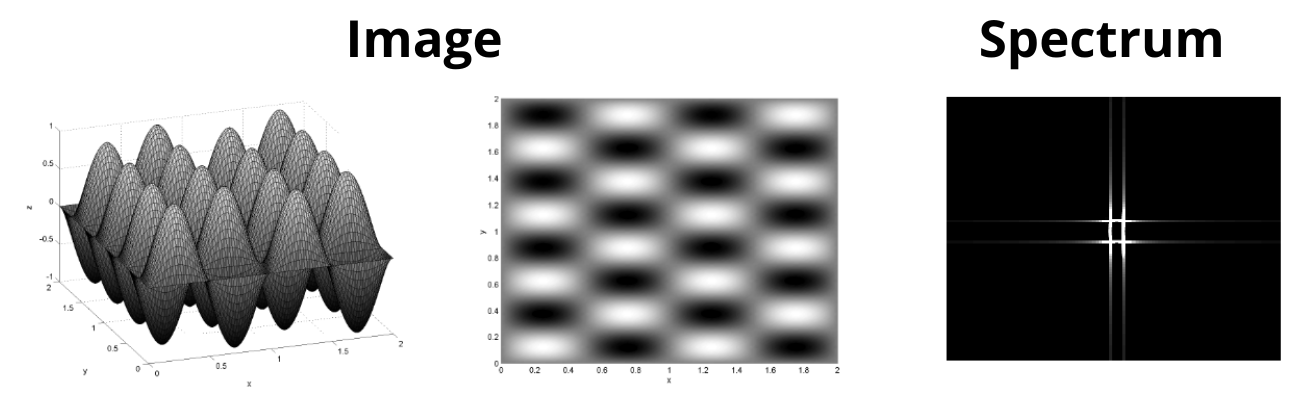

In [41]:
Image(filename=".././images/4_2.png", width=600)
# Source: https://www.princeton.edu/~cuff/ele201/kulkarni_text/frequency.pdf

# Magnituda i faza 
Dzięki transformacji Fouriera można uzyskać informacje o magnitudzie i fazie badananego sygnału. Z tych dwóch, kluczowe znaczenie ma faza. Poniższy przykład udowadnia, że jesli zamienimy magnitudy dwóch obrazów ze sobą, a fazy zostaną zgodnie z obrazem, to po operacji transformacji odwrotnej będziemy w stanie uzyskać obraz, zblizony do pierwotnego. 

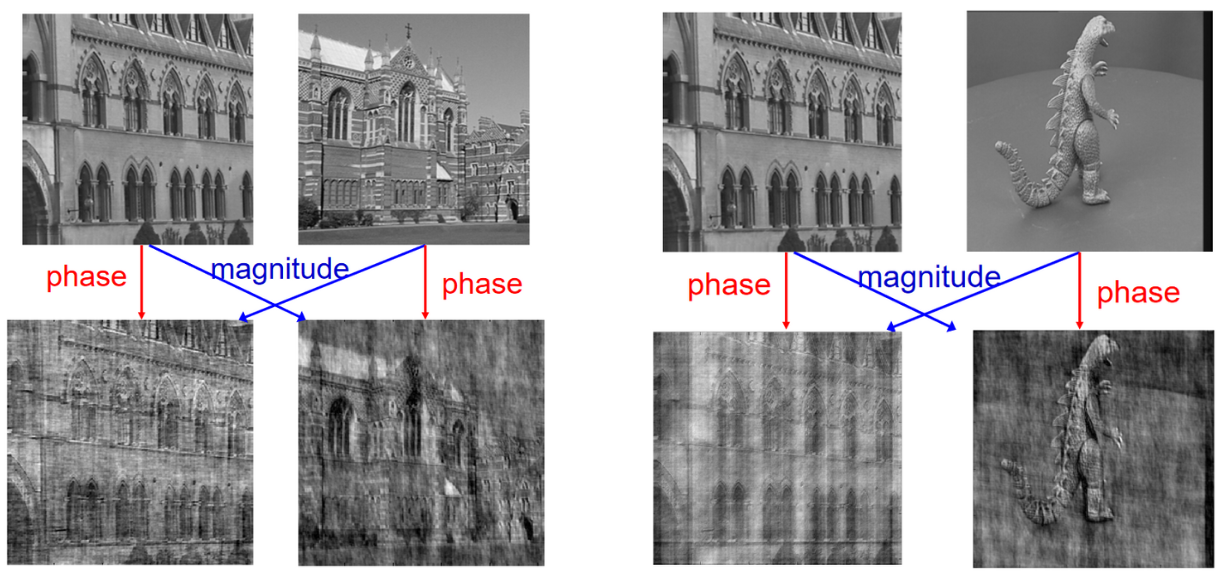

In [42]:
Image(filename=".././images/4_3.png", width=600)
# Source: https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf

# Konwolucja i Transformacja Fouriera - co mają ze sobą wspólnego?
Istnieje pewna zależność pomiędzy tymi dwoma operacjami, opisana twierdzeniem o konwolucji: konwolucja dwóch sygnałów w dziedzinie czasu odpowiada mnożeniu ich transformacji Fouriera w dziedzinie częstotliwości. Równocześnie konwolucja dwóch sygnałów w dziedzinie częstotliwości, odpowiada mnożeniu ich transformacji odwrotnych w dziedzinie czasu. Związane to jest z dualnością twierdzenia o konwolucji, inymi słowy operacja konwolucji jest symetryczna względem dziedziny, w której jest wykonywana, jeśli weźmiemy pod uwagę transformację Fouriera i jej odwotność. 

Zastanów się, skoro operacji konwolucji używaliśmy do filtracji... to tak, teraz filtrację możemy również wykonać w dziedzinie częstotliwości. Pozwala to nie tylko wykonać te szybciej, ale także umożliwia sprecyzować operację konwolucji w zakresie zmian różnych częstotliwości.

Obecnie operacje na widmie obrazu są stosowane zdecydowane rzadziej niż w przeszłości. Wynika to z faktu, że kiedyś algorytmy o złożoności O(n) = aNlog(bN) (takie jak transformacja Fouriera i jej odwrotność) były zdecydowanie bardziej atrakcyjne obliczeniowo od algorytmów O(n) = aN^2. Obecnie jednak, dzięki układom GPU współczynniki stałe oraz możliwość zrównoleglenia powoduję, że algorytmy działające bezpośrednio na obrazach są zdecydowanie szybsze niż stosowanie transformacji do innej przestrzeni, np. obecnie wykorzystanie układów tensorowych do konwolucji jest kilka tysięcy razy szybsze niż konwolucja poprzez mnożenie w przestrzeni Fouriera, podczas gdy jeszcze ~20 lat temu sytuacja była kompletnie odwrotna. Niemniej jednak, w praktyce przetwarzania i analizy obrazów dalej są stosowane transformacje do innych przestrzeni, jednak uzasadnienie nie wynika już z szybkości obliczeń, a algebry działającej w danej przestrzeni.

# Filtracja w dziedzinie częstotliwości

Filtry można podzielić na 2 rodzaje:
- filtry górnoprzepustowe (wykrywające krawędzie) - przepuszcza wysokie częstotliwości, blokuje niskie częstotliwości
- filtry dolnoprzepustowe (wygładzające) - przepuszcza niskie częstotliwości, blokuje wysokie częstotliwości
- filtry środkowoprzepustowe - przepuszczają określony zakres częstotliwości, pozostałe blokuje
- filtry środkowozaporowe - blokują określony zakres częstotliwości, pozostałe przepuszczają

Poniższy przykład doskonale obrazuje sposób przeprowadzania filtracji w dziedzini częstotliwości. 

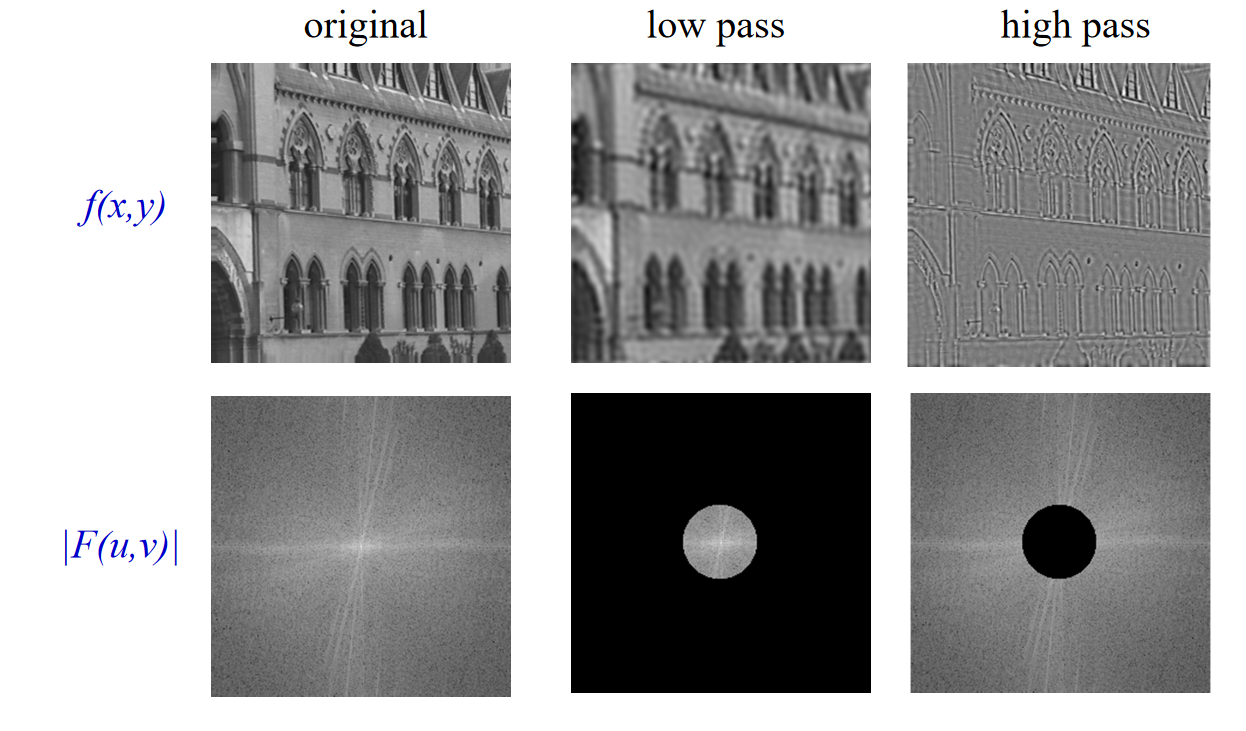

In [43]:
Image(filename=".././images/4_4.png", width=600)
# Source: https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf

# Praktyczny przykład filtracji w dziedzinie częstotliwości
Tak jak zostało powiedziane wcześnie, obecnie nie ma potrzeby przeprowadzania filtracji w dziedzinie częstotliwości ze względu na korzyści obliczeniowe. Jednakże są czasem sytuacje, w których konkretnie interesuje nas usunięcie pewnych częstotliwości, które jesteśmy w stanie zaobserwować na widmie i na obrazie. Doskonale odzwierciedla to poniższy przykład zdjęcia satelitarnego. Widoczny jest tam szum w postaci kolejnych poziomych lini - ciężko byłoby je usunać tradycyjnymi filtrami w dziedzinie przestrzennej (pikseli). W dziedzinie częstotliwości jest to o wiele prostsze zadanie. 

Jak widać, czasami przydatna może być znajomość możliwości transformacji Fouriera.

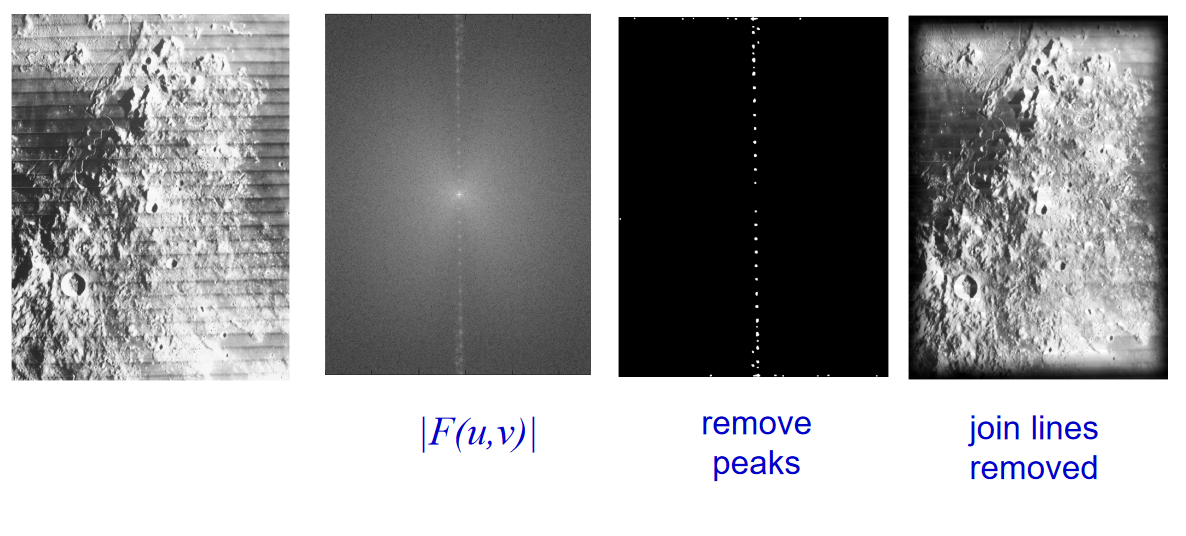

In [44]:
Image(filename=".././images/4_5.png", width=600)
# Source: https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf

A tu kolejny przykład:

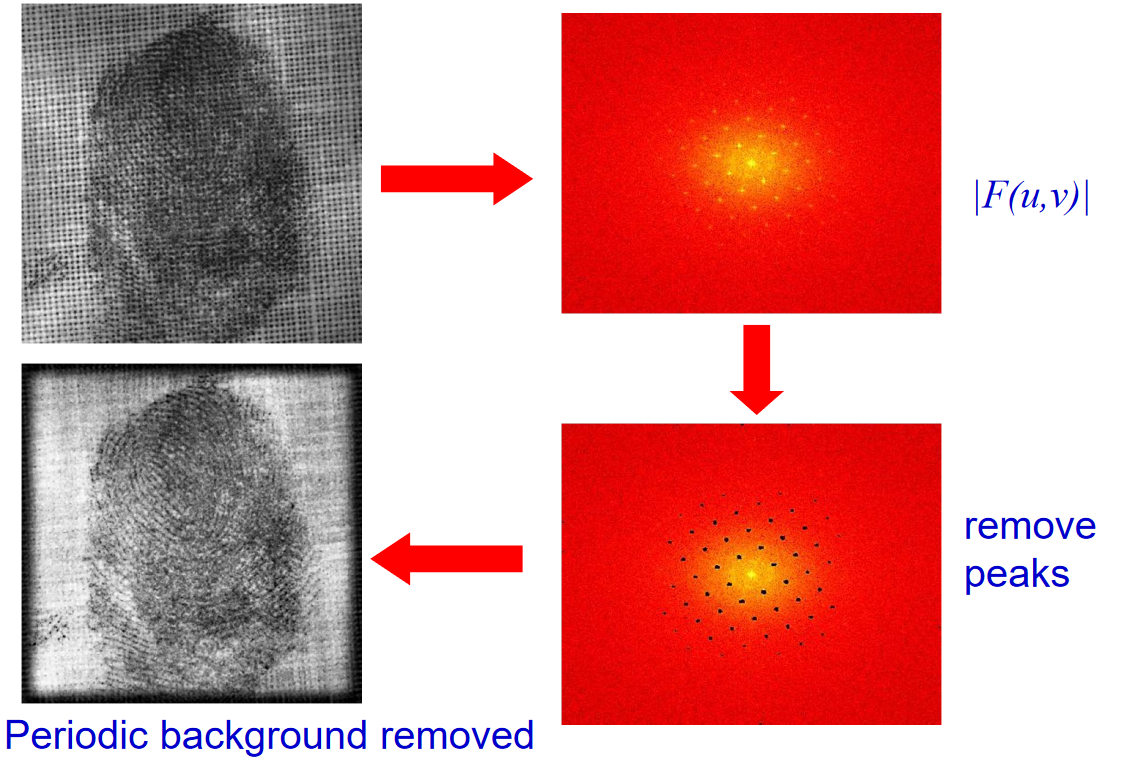

In [45]:
Image(filename=".././images/4_6.png", width=600)
# Source: https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf

# Źródła
- https://web.stanford.edu/class/archive/cs/cs279/cs279.1172/lectures/lecture8.pdf
- https://www.princeton.edu/~cuff/ele201/kulkarni_text/frequency.pdf
- https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf